# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Set-up" data-toc-modified-id="Set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set-up</a></div><div class="lev1 toc-item"><a href="#Regarding-data_txt" data-toc-modified-id="Regarding-data_txt-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regarding data_txt</a></div><div class="lev1 toc-item"><a href="#Mean-of-data_txt" data-toc-modified-id="Mean-of-data_txt-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mean of data_txt</a></div><div class="lev1 toc-item"><a href="#Plotting-mean-expression-levels" data-toc-modified-id="Plotting-mean-expression-levels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting mean expression levels</a></div><div class="lev1 toc-item"><a href="#Plotting-normal-distributions" data-toc-modified-id="Plotting-normal-distributions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting normal distributions</a></div><div class="lev1 toc-item"><a href="#Write-df-to-file" data-toc-modified-id="Write-df-to-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Write df to file</a></div><div class="lev1 toc-item"><a href="#CoefVar-function-and-plots" data-toc-modified-id="CoefVar-function-and-plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CoefVar function and plots</a></div><div class="lev1 toc-item"><a href="#Reproduction-of-Clay's-Plots" data-toc-modified-id="Reproduction-of-Clay's-Plots-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Reproduction of Clay's Plots</a></div>

###### Preamble

In [50]:
library(repr)

# Set-up

** Read in files **

In [51]:
data_csv = read.table("GacuRNAseq_Subset.csv", row.names = 1, header = T, sep = ",")

In [52]:
data_txt = read.table("GacuRNAseq_Subset.txt", row.names = 1, header = T, sep = "\t")

In [53]:
head(data_csv)
dim(data_csv)

,Population,Treatment,Sex,ENSGACG00000000003,ENSGACG00000000004,ENSGACG00000000006,ENSGACG00000000007,ENSGACG00000000008,ENSGACG00000000009,ENSGACG00000000010,⋯,ENSGACG00000000235,ENSGACG00000000236,ENSGACG00000000239,ENSGACG00000000242,ENSGACG00000000245,ENSGACG00000000246,ENSGACG00000000247,ENSGACG00000000248,ENSGACG00000000249,ENSGACG00000000250
BtCV1,Boot,Conventional,male,5.800022,7.733363,41.56683,124.70048,2.900011,356.7014,203.0008,⋯,417.6016,16.433397,16.43340,434.0350,1.933341,21.26675,15.46673,65.73359,42.53350,230.0676
BtCV2,Boot,Conventional,male,21.331358,9.599111,62.92751,97.05768,6.399407,348.7677,297.5724,⋯,358.3668,18.131654,42.66272,425.5606,9.599111,41.59615,26.66420,66.12721,54.39496,274.1080
BtCV3,Boot,Conventional,female,13.732143,5.281593,70.77335,82.39286,7.394231,361.2610,296.8256,⋯,381.3311,26.407968,22.18269,414.0769,4.225275,26.40797,24.29533,47.53434,49.64698,249.2912
BtCV4,Boot,Conventional,female,15.255118,5.867353,118.52053,69.23477,5.867353,448.2658,213.5716,⋯,382.5514,17.602059,38.72453,454.1331,5.867353,48.11229,39.89800,57.50006,51.63271,396.6331
BtCV5,Boot,Conventional,male,4.348010,5.435013,66.30716,82.61220,5.435013,470.6721,227.1835,⋯,417.4090,17.392042,42.39310,421.7570,4.348010,40.21910,13.04403,52.17612,34.78408,361.9719
BTMA1,Boot,MonoAssoc,male,9.622744,19.245488,92.37834,160.69982,3.849098,257.8895,367.5888,⋯,218.4363,6.735921,76.98195,519.6282,9.622744,51.00054,25.01913,54.84964,34.64188,217.4740


[1]  20 185

In [115]:
head(data_txt)
dim(data_txt)

,Population,Treatment,Sex,ENSGACG00000000003,ENSGACG00000000004,ENSGACG00000000006,ENSGACG00000000007,ENSGACG00000000008,ENSGACG00000000009,ENSGACG00000000010,⋯,ENSGACG00000000235,ENSGACG00000000236,ENSGACG00000000239,ENSGACG00000000242,ENSGACG00000000245,ENSGACG00000000246,ENSGACG00000000247,ENSGACG00000000248,ENSGACG00000000249,ENSGACG00000000250
BtCV1,Boot,Conventional,male,5.800022,7.733363,41.56683,124.70048,2.900011,356.7014,203.0008,⋯,417.6016,16.433397,16.43340,434.0350,1.933341,21.26675,15.46673,65.73359,42.53350,230.0676
BtCV2,Boot,Conventional,male,21.331358,9.599111,62.92751,97.05768,6.399407,348.7677,297.5724,⋯,358.3668,18.131654,42.66272,425.5606,9.599111,41.59615,26.66420,66.12721,54.39496,274.1080
BtCV3,Boot,Conventional,female,13.732143,5.281593,70.77335,82.39286,7.394231,361.2610,296.8256,⋯,381.3311,26.407968,22.18269,414.0769,4.225275,26.40797,24.29533,47.53434,49.64698,249.2912
BtCV4,Boot,Conventional,female,15.255118,5.867353,118.52053,69.23477,5.867353,448.2658,213.5716,⋯,382.5514,17.602059,38.72453,454.1331,5.867353,48.11229,39.89800,57.50006,51.63271,396.6331
BtCV5,Boot,Conventional,male,4.348010,5.435013,66.30716,82.61220,5.435013,470.6721,227.1835,⋯,417.4090,17.392042,42.39310,421.7570,4.348010,40.21910,13.04403,52.17612,34.78408,361.9719
BTMA1,Boot,MonoAssoc,male,9.622744,19.245488,92.37834,160.69982,3.849098,257.8895,367.5888,⋯,218.4363,6.735921,76.98195,519.6282,9.622744,51.00054,25.01913,54.84964,34.64188,217.4740


[1]  20 185

# Regarding data_txt

*** What type of object is data_txt? ***

In [55]:
class(data_txt)

[1] "data.frame"

*** Name all of the “explanatory variables.”  ***

In [56]:
names(data_txt)[1:3]

[1] "Population" "Treatment"  "Sex"

***  How many factor levels are there for each factor?  ***

In [57]:
unique(data_txt[,1])
unique(data_txt[,2])
unique(data_txt[,3])

[1] Boot         RabbitSlough
Levels: Boot RabbitSlough

[1] Conventional MonoAssoc   
Levels: Conventional MonoAssoc

[1] male   female
Levels: female male

*** What type of vector are the factor columns? ***

In [58]:
class(data_txt[,1])
class(data_txt[,2])
class(data_txt[,3])

[1] "factor"

[1] "factor"

[1] "factor"

*** How many “response variables” do we have in this dataset? What class are they?  ***

In [59]:
# length of a vector of all row names minus the explanatory variables (3)
length(names(data_txt)) - 3

[1] 182

In [60]:
for (i in seq(4, length(names(data_txt)))) {
    print(class(data_txt[,i]))
    }

[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "n

# Mean of data_txt

*** Calculate the mean of all expression values for the first gene. ***

In [61]:
mean(data_txt$ENSGACG00000000003)

[1] 20.0366

*** Calculate the mean of all expression values for the second gene. ***

In [62]:
mean(data_txt$ENSGACG00000000004)

[1] 5.014469

*** Calculate means for the first and second gene in a single expression ***

In [63]:
lapply(data_txt[4:5], mean)

$ENSGACG00000000003
[1] 20.0366

$ENSGACG00000000004
[1] 5.014469

*** Using lapply() again, calculate the mean expression level for the first 100 genes, and store them as an object called expr_means_100. ***

In [64]:
expr_means_100 = lapply(data_txt[4:103], mean)

*** What happens when you try to take the mean of expr_means_100? ***

In [65]:
mean(expr_means_100)

Warning message in mean.default(expr_means_100):
“argument is not numeric or logical: returning NA”

[1] NA

*** Better check what type of object expr_means_100 is ***

In [66]:
class(expr_means_100)

[1] "list"

In [67]:
# convert the named list to a numeric vector
expr_means_100 = unlist(expr_means_100, use.names = FALSE) 

In [68]:
class(expr_means_100)

[1] "numeric"

# Plotting mean expression levels

***  Plot a frequency distribution for these 100 values ***

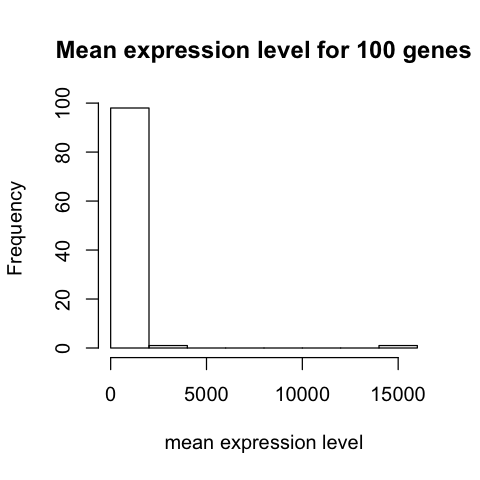

In [69]:
# pdf('hist_mean_exp.pdf')
options(repr.plot.width=4, repr.plot.height=4)
hist(expr_means_100, xlab = "mean expression level", main = "Mean expression level for 100 genes")
# dev.off()

*** To make a more meaningful histogram, plot the log (base 10) of the means instead ***

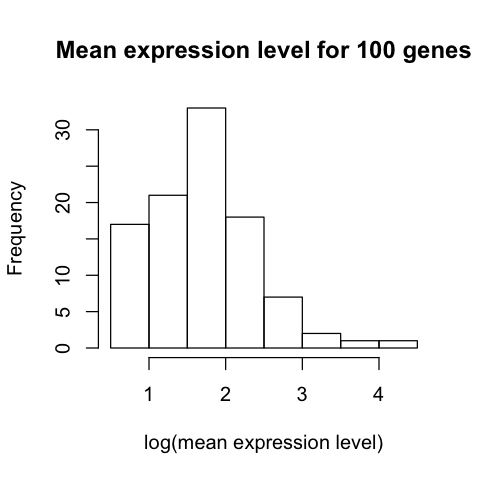

In [70]:
# pdf('hist_logmean_exp.pdf')
options(repr.plot.width=4, repr.plot.height=4)
hist(log(expr_means_100, 10), xlab = "log(mean expression level)", main = "Mean expression level for 100 genes")
# dev.off()

*** Subset your expr_means so that you only take means < 500 and plot the new
histogram. How many genes are there? ***

In [71]:
expr_means_sub = subset(expr_means_100, expr_means_100 < 500)

In [72]:
length(expr_means_sub)

[1] 93

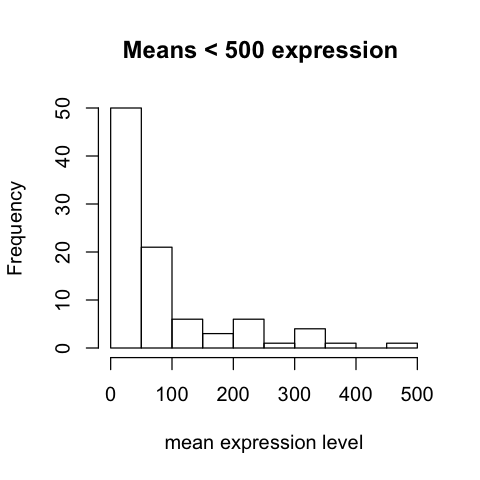

In [73]:
# pdf('hist_subset_exp.pdf')
options(repr.plot.width=4, repr.plot.height=4)
hist(expr_means_sub, xlab = "mean expression level", main = "Means < 500 expression ")
# dev.off()

*** Calculate the mean expression value (for the 2nd gene in the dataset), for Boot Lake individuals, and Rabbit Slough individuals separately. ***

In [74]:
tapply(data_txt[,5], data_txt$Population, mean)

Boot RabbitSlough 
   9.8480121    0.1809256

*** Also calculate the mean for all individuals, and also calculate standard deviations
for all three sets. ***

In [92]:
# all individuals
mean(data_txt[,5])
sd(data_txt[,5])

# seperate populations sd
tapply(data_txt[,5], data_txt$Population, sd)

[1] 5.014469

[1] 6.287977

Boot RabbitSlough 
   5.6041829    0.3815023

# Plotting normal distributions

*** Generate a sample of 1000 values from a normal distribution, using the mean and standard deviation calculated from the Rabbit Slough individuals. ***

In [105]:
rabbit_dist = rnorm(1000, 0.18092559, 0.381502256661351)

*** Now do the same based on the mean and standard deviation from the Boot
individuals. ***

In [106]:
boot_dist = rnorm(1000, 9.84801214, 5.60418290498567)

*** Also do the same based on the mean and standard deviation from all individuals. ***

In [107]:
all_dist = rnorm(1000, 5.014468865, 6.28797725766485)

***Generate a figure with three panels (three rows and one column) that includes histogram plots from your three samples. ***

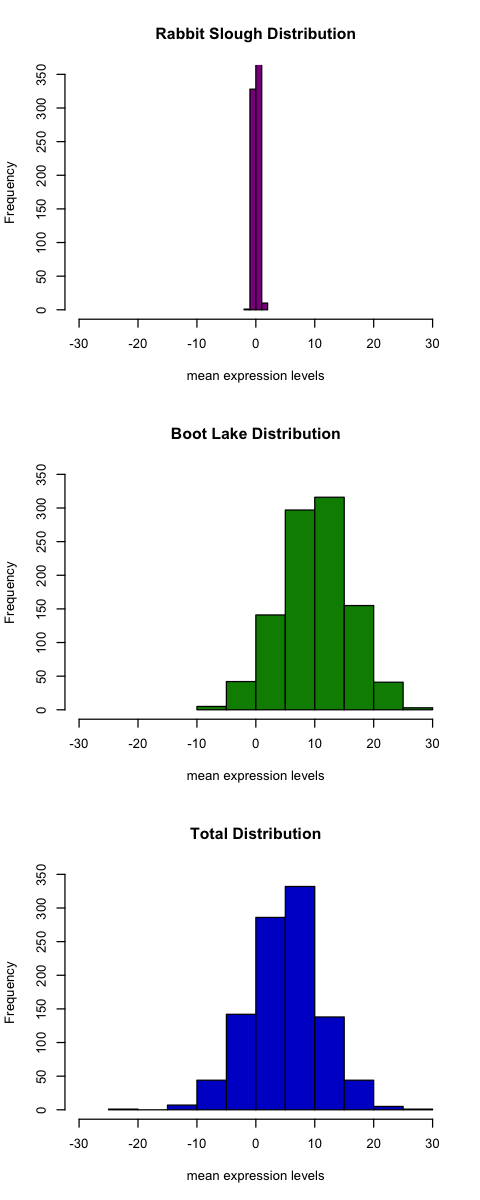

In [117]:
# pdf('Gene2_Pop_NormSamp.pdf')
options(repr.plot.width=4, repr.plot.height=10)

par(mfrow = c(3,1))

hist(rabbit_dist, xlim = range(-30, 30), ylim = range(0, 350), xlab = "mean expression levels", main = "Rabbit Slough Distribution", col = "magenta4", breaks = 3)
hist(boot_dist, xlim = range(-30, 30), ylim = range(0, 350), xlab = "mean expression levels", main = "Boot Lake Distribution", col = "green4")
hist(all_dist, xlim = range(-30, 30), ylim = range(0, 350), xlab = "mean expression levels", main = "Total Distribution", col = "blue3")
# dev.off()

# Write df to file

***  Define a new dataframe called three_genes, which contains the factor
columns and the expression values for the first 3 genes. ***

In [80]:
three_genes = data_txt[1:6]

*** Write this to a .csv file and save it to your computer as three_genes.csv. ***

In [81]:
write.table(three_genes, 'three_genes.csv', sep = ",")

# CoefVar function and plots

*** Write a function (called coefvar) to calculate the coefficient of variation (CV) for a specified numeric vector. Write a for loop to generate a vector of CVs for all genes.***

In [82]:
CoefVar = function(mean, sd) {
    (sd / mean)*100
}

cvs = numeric()

for (i in seq(4, length(names(data_txt)))) {
    cvs[i-3] = CoefVar(mean(data_txt[,i]), sd(data_txt[,i]))
    }

*** Plot a histogram, then a boxplot of the distribution of CVs ***

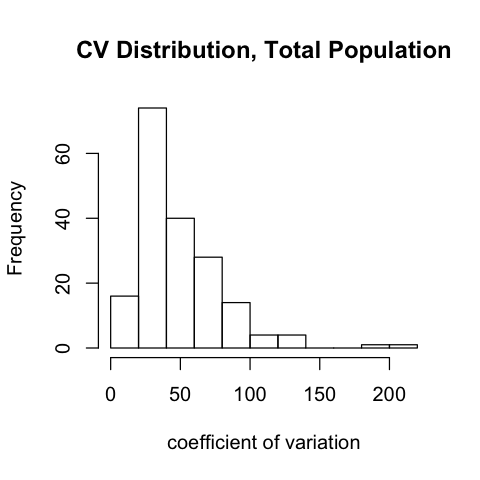

In [83]:
# pdf('CV_hist.pdf') 
options(repr.plot.width=4, repr.plot.height=4)
hist(cvs, main = "CV Distribution, Total Population", xlab = "coefficient of variation")
# dev.off()

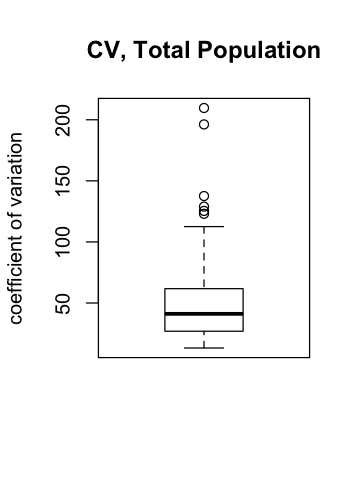

In [84]:
# pdf('CV_boxplot.pdf')
options(repr.plot.width=3, repr.plot.height=4)
boxplot(cvs, main = "CV, Total Population", ylab = "coefficient of variation")
# dev.off()

*** Write two separate loops, as above, to generate CV vectors, one for Boot and one for Rabbit Slough. This time, however, use the subset() function to define the vectors being iterated over. ***

In [85]:
CoefVar = function(mean, sd) {
    (sd / mean)*100
}

boot_cvs = numeric()
rabbit_cvs = numeric()

boot_data = subset(data_txt, data_txt$Population == "Boot")
rabbit_data = subset(data_txt, data_txt$Population == "RabbitSlough")

for (i in seq(4, length(names(data_txt)))) {
    boot_cvs[i-3] = CoefVar(mean(boot_data[,i]), sd(boot_data[,i]))
    }

for (i in seq(4, length(names(data_txt)))) {
    rabbit_cvs[i-3] = CoefVar(mean(rabbit_data[,i]), sd(rabbit_data[,i]))
    }

*** How do the two CV distributions compare (look at the two distributions using hist() and boxplot())? ***

The coefficient variation distribution looks very similar between both population. The histograms look nearly the same. The boxplots show that the coefficient variation between the population have similar medians, maximums, first and third quartiles. The rabbit population does have some outliers that have higher coefficients of variation. 

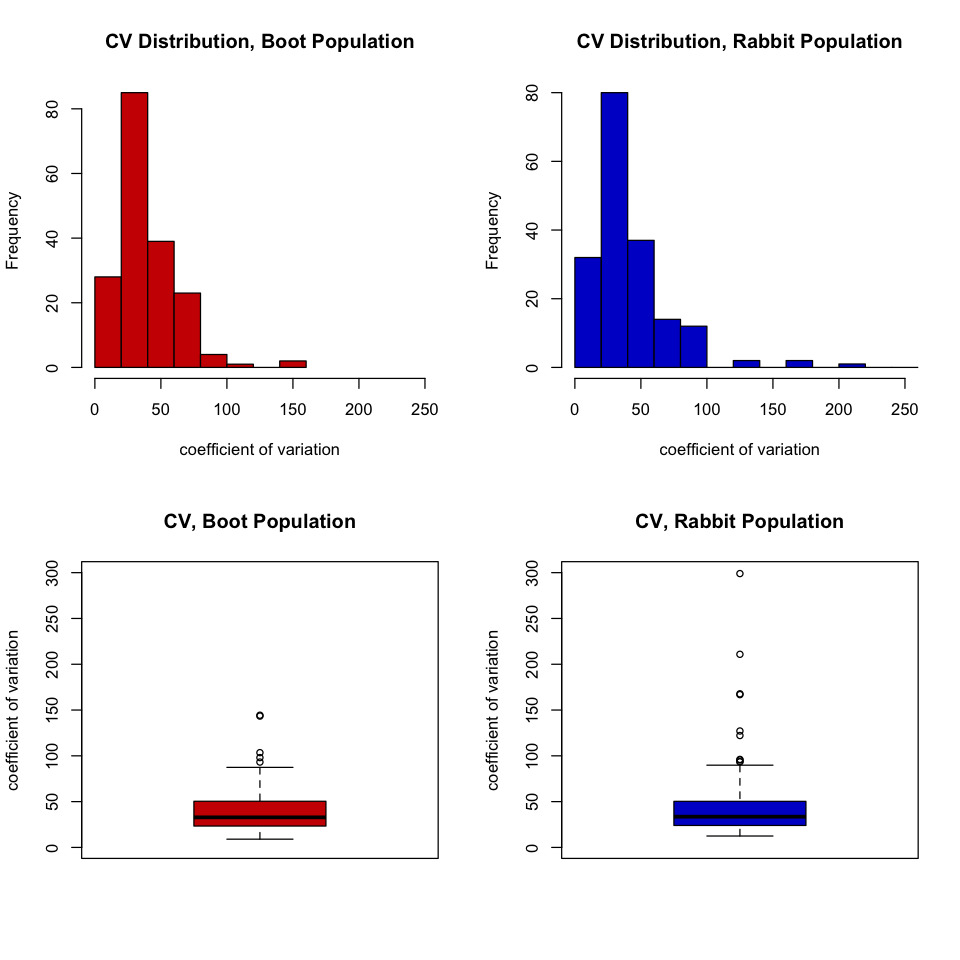

In [86]:
options(repr.plot.width=8, repr.plot.height=8)

par(mfrow = c(2,2))

hist(boot_cvs, main = "CV Distribution, Boot Population", xlab = "coefficient of variation", col = "red3", xlim = range(0, 250, breaks = 20))
hist(rabbit_cvs, main = "CV Distribution, Rabbit Population", xlab = "coefficient of variation", col = "blue3", xlim = range(0, 250), breaks = 20)
boxplot(boot_cvs, main = "CV, Boot Population", ylab = "coefficient of variation", col = "red3", ylim = range(0, 300))
boxplot(rabbit_cvs, main = "CV, Rabbit Population", ylab = "coefficient of variation", col = "blue3", ylim = range(0, 300))

*** Think about how the coefficient of variation is calculated. Why might the CV be a better measure than the standard deviation when comparing two different variables? ***

The coefficient of variation allows us to understand the relative magnitude of the standard deviation. The magnitude of the standard deviation depends on the data sampled. Using the coefficient of variation allows us to compare standard deviations between samples of data, in our situation different variables.

# Reproduction of Clay's Plots

*** Reproduce the boxplots I showed in lecture to illustrate statistical vs. practical significance. The following functions will help: rnorm(), data.frame(), colnames(), c(), cbind(), rep(), and t.test() ***

In [87]:
diet_a_small = rnorm(10, mean = 20, sd = 1)
diet_a_large = rnorm(1000, mean = 20.2, sd = 1)

In [88]:
diet_b_small = rnorm(10, mean = 20, sd = 1)
diet_b_large = rnorm(1000, mean = 20.2, sd = 1)

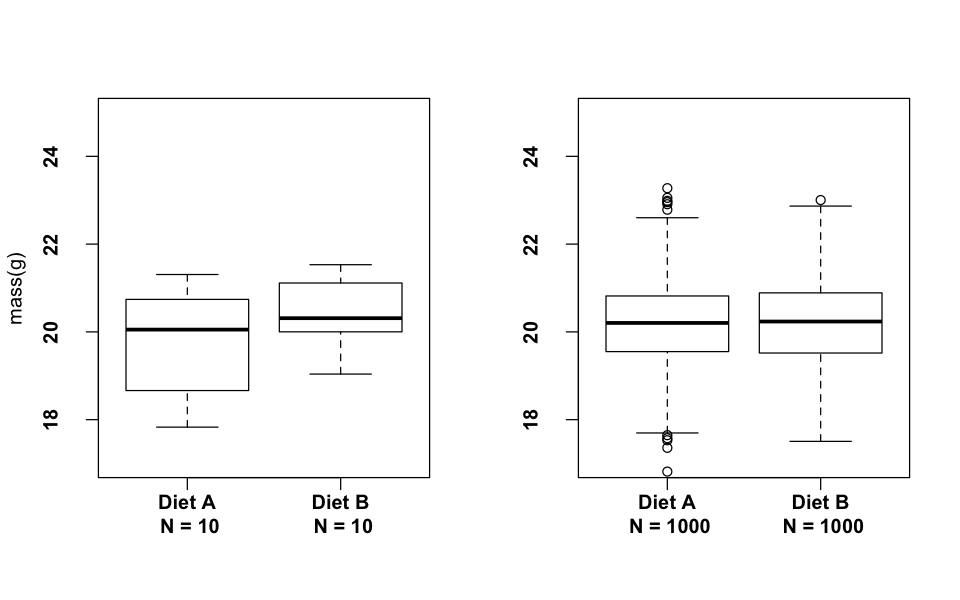

In [89]:
# pdf("claysPlots.pdf")
options(repr.plot.width = 8, repr.plot.height = 5)

par(mfrow = c(1, 2), mgp=c(3, 1.5, 0), font.axis = 2)

boxplot(diet_a_small, diet_b_small, ylim = c(17, 25), names = c("Diet A\n N = 10", "Diet B\n N = 10"), ylab = "mass(g)")
boxplot(diet_a_large, diet_b_large, ylim = c(17, 25), names = c("Diet A\n N = 1000", "Diet B\n N = 1000")) 
# dev.off()

*** Perform a t-test on the datasets ***

Diet A versus Diet B, N = 10: p = 0.5177  
Diet A versus Diet B, N = 1000: p = 0.7912

In [90]:
t.test(diet_a_small, diet_b_small)


	Welch Two Sample t-test

data:  diet_a_small and diet_b_small
t = -1.365, df = 15.288, p-value = 0.192
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6043482  0.3504266
sample estimates:
mean of x mean of y 
 19.76985  20.39681 


In [91]:
t.test(diet_a_large, diet_b_large)


	Welch Two Sample t-test

data:  diet_a_large and diet_b_large
t = -0.3442, df = 1997.9, p-value = 0.7307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10203723  0.07156794
sample estimates:
mean of x mean of y 
 20.19694  20.21217 
